# **Data Prep and Cleaning**

### **Importing libraries and dataset**
For this activity, the dataset was imported from this [source](https://raw.githubusercontent.com/angelaaaateng/ftw_python/main/data/titanic_train_demo.csv).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import scipy.stats as stats

In [ ]:
titanic = pd.read_csv("https://raw.githubusercontent.com/angelaaaateng/ftw_python/main/data/titanic_train_demo.csv")

### **Exploring the dataset**

In [ ]:
#display the first five rows
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#find the number of rows and columns
titanic.shape

(891, 12)

In [ ]:
#getting the column names
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
#printing descriptive statistics of numerical data
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#to get a list of numeric columns
titanic.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

### **Handling missing data and incorrect data types**

In [ ]:
#checking info and data types
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerID

**Some columns have their data types wrong, specifically the PassengerID, Survived, and Pclass. We don't want to accidentaly perfrom numerical analyses on them so, instead of being integers, we can convert them to strings.**



In [ ]:
#converting PassengerId, Survived, Pclass to string
titanic['PassengerId'] = titanic['PassengerId'].astype('str')
titanic['Survived'] = titanic['Survived'].astype('str')
titanic['Pclass'] = titanic['Pclass'].astype('str')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    object 
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 83.7+ KB


**Data types are now fixed. The next step is checking for null values.**

In [ ]:
#checking for null values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**To better visualize the null values and their distribution, a nullity matrix is shown below.**

<Axes: >

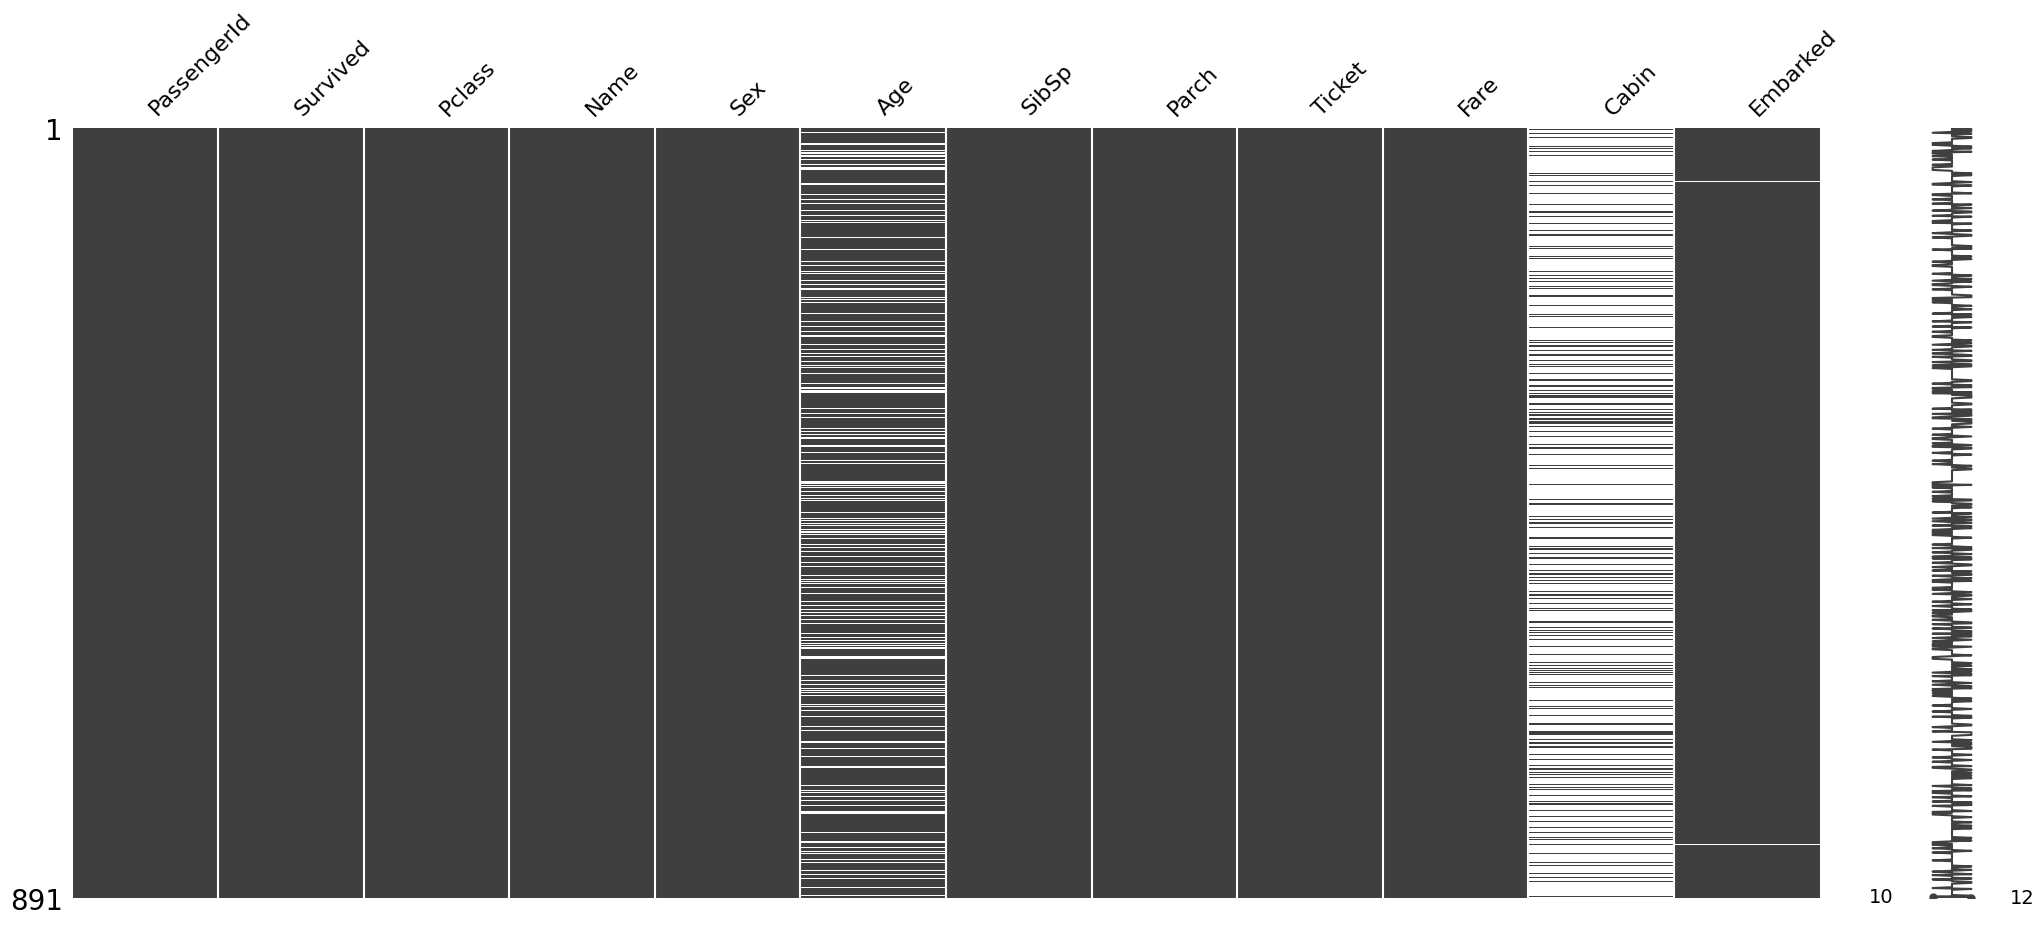

In [ ]:
#visualizing the null values
msno.matrix(titanic)

**Cabin has the most number of null values. Imputing them may not work, so instead we can encode them as 1 for rows with known cabin and 0 for the missing values.**

In [ ]:
#encoding cabin data as 1 (Known) or 0 (Unknown)
titanic.Cabin.fillna(0, inplace=True)

Wcabin = []
for i in titanic['Cabin']:
    if i == 0:
        Wcabin.append(0)
    else:
        Wcabin.append(1)

#adding the new column
titanic['Wcabin'] = Wcabin

#dropping the cabin column
titanic.drop('Cabin',axis=1,inplace=True)

<Axes: >

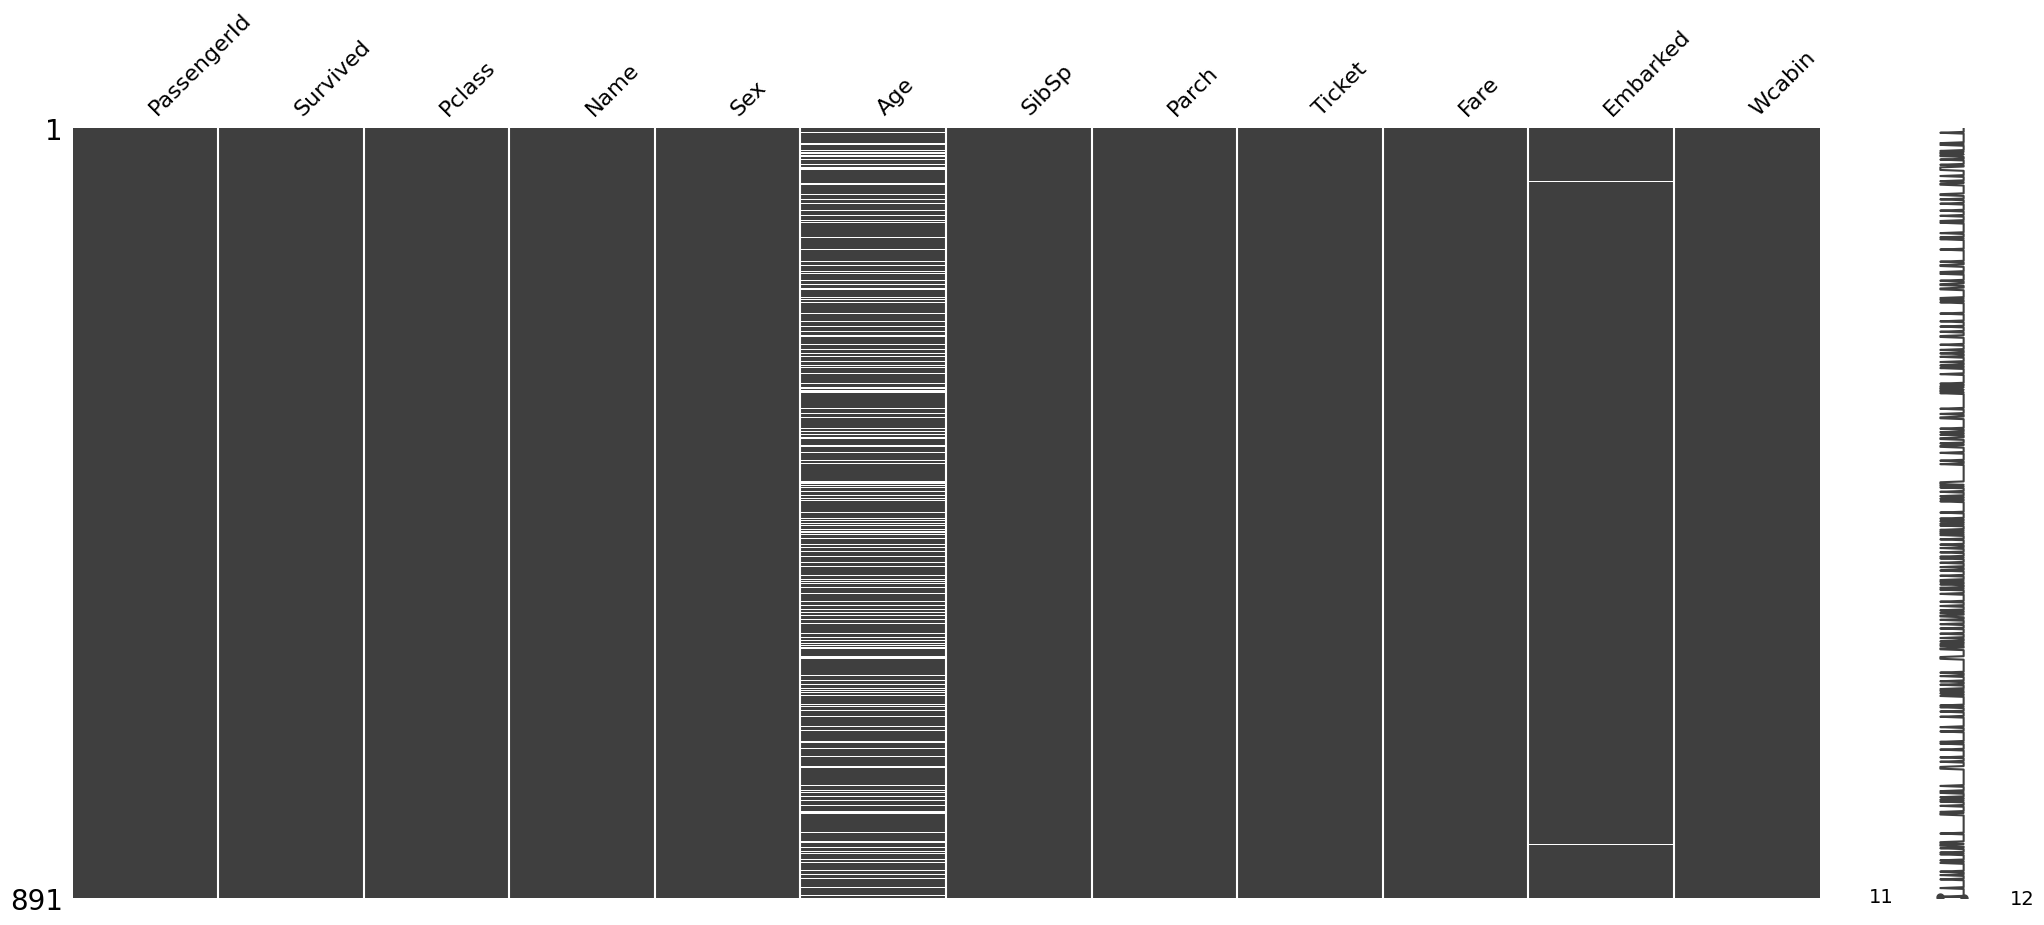

In [ ]:
#check for null values
msno.matrix(titanic)

**Cabin column is now dropped. Wcabin column is added with the coded cabin data. Wcabin has no missing value.**

<Axes: xlabel='Pclass', ylabel='Age'>

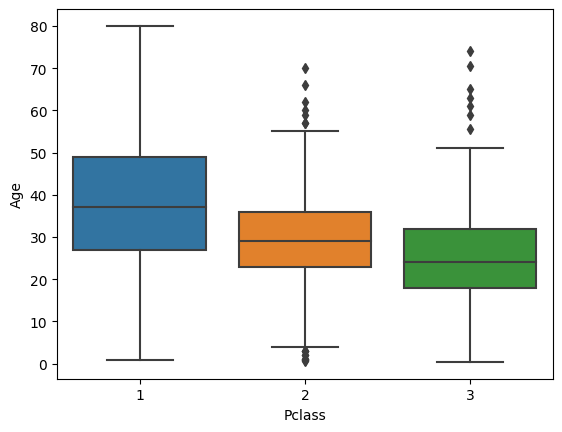

In [ ]:
#visualizing age distribution by Passenger Class
sns.boxplot(data=titanic, x="Pclass", y="Age", order=['1','2','3'])

**The boxplot above shows that the mean age of the passengers differ based on their Passenger class. It makes sense that older and wealthier passengers opted for Class 1.**

**The boxplot below further shows the fare distribution based on Passenger Class.**

<Axes: xlabel='Pclass', ylabel='Fare'>

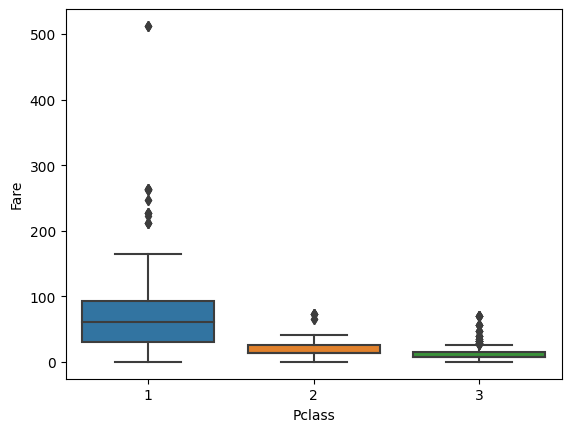

In [ ]:
sns.boxplot(data=titanic, x="Pclass", y="Fare", order=['1','2','3'])

<ipython-input-19-412a1e7fd335>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  titanic['Age']=titanic.groupby('Pclass')['Age'].apply(lambda x:x.fillna(x.mean()))


<Axes: >

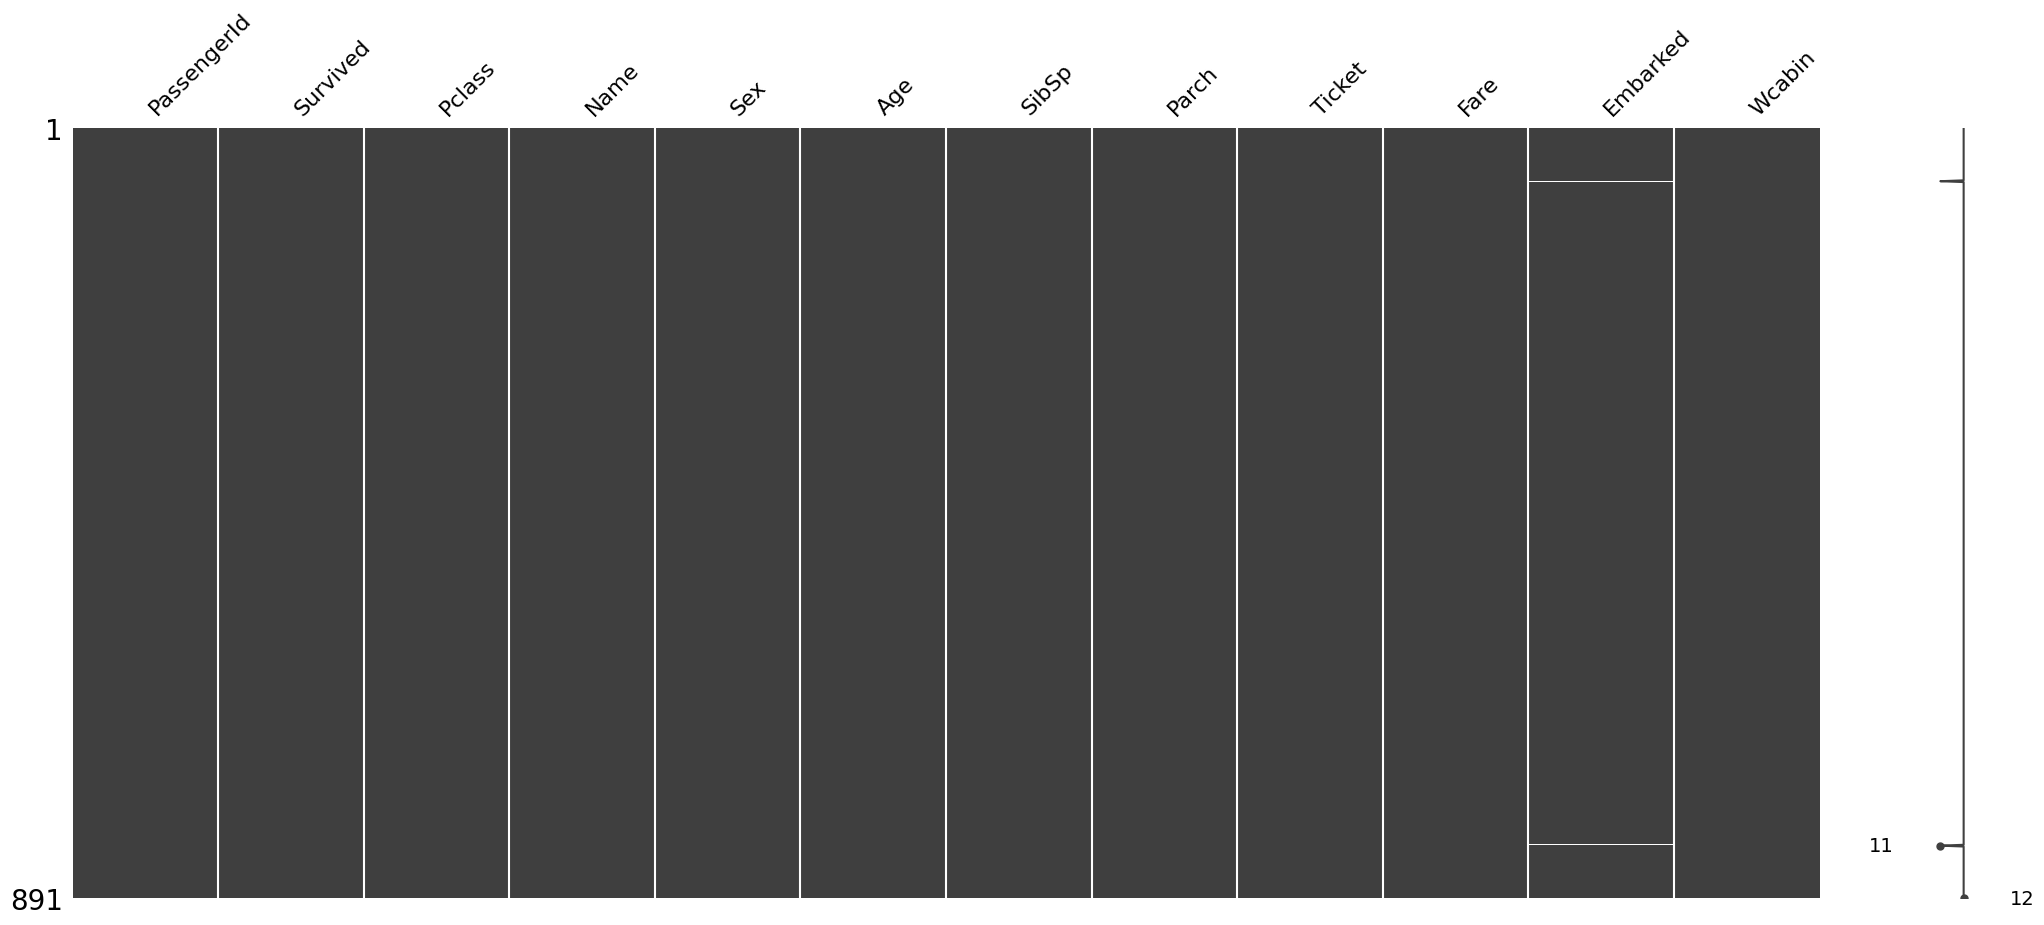

In [ ]:
#imputing missing Age based on their Passenger Class
titanic['Age']=titanic.groupby('Pclass')['Age'].apply(lambda x:x.fillna(x.mean()))
msno.matrix(titanic)

**The missing values in the Age column is now filled. Finally, the two rows with missing data in the Embarked column can be dropped since it only accounts for 0.22% of our data.**

<Axes: >

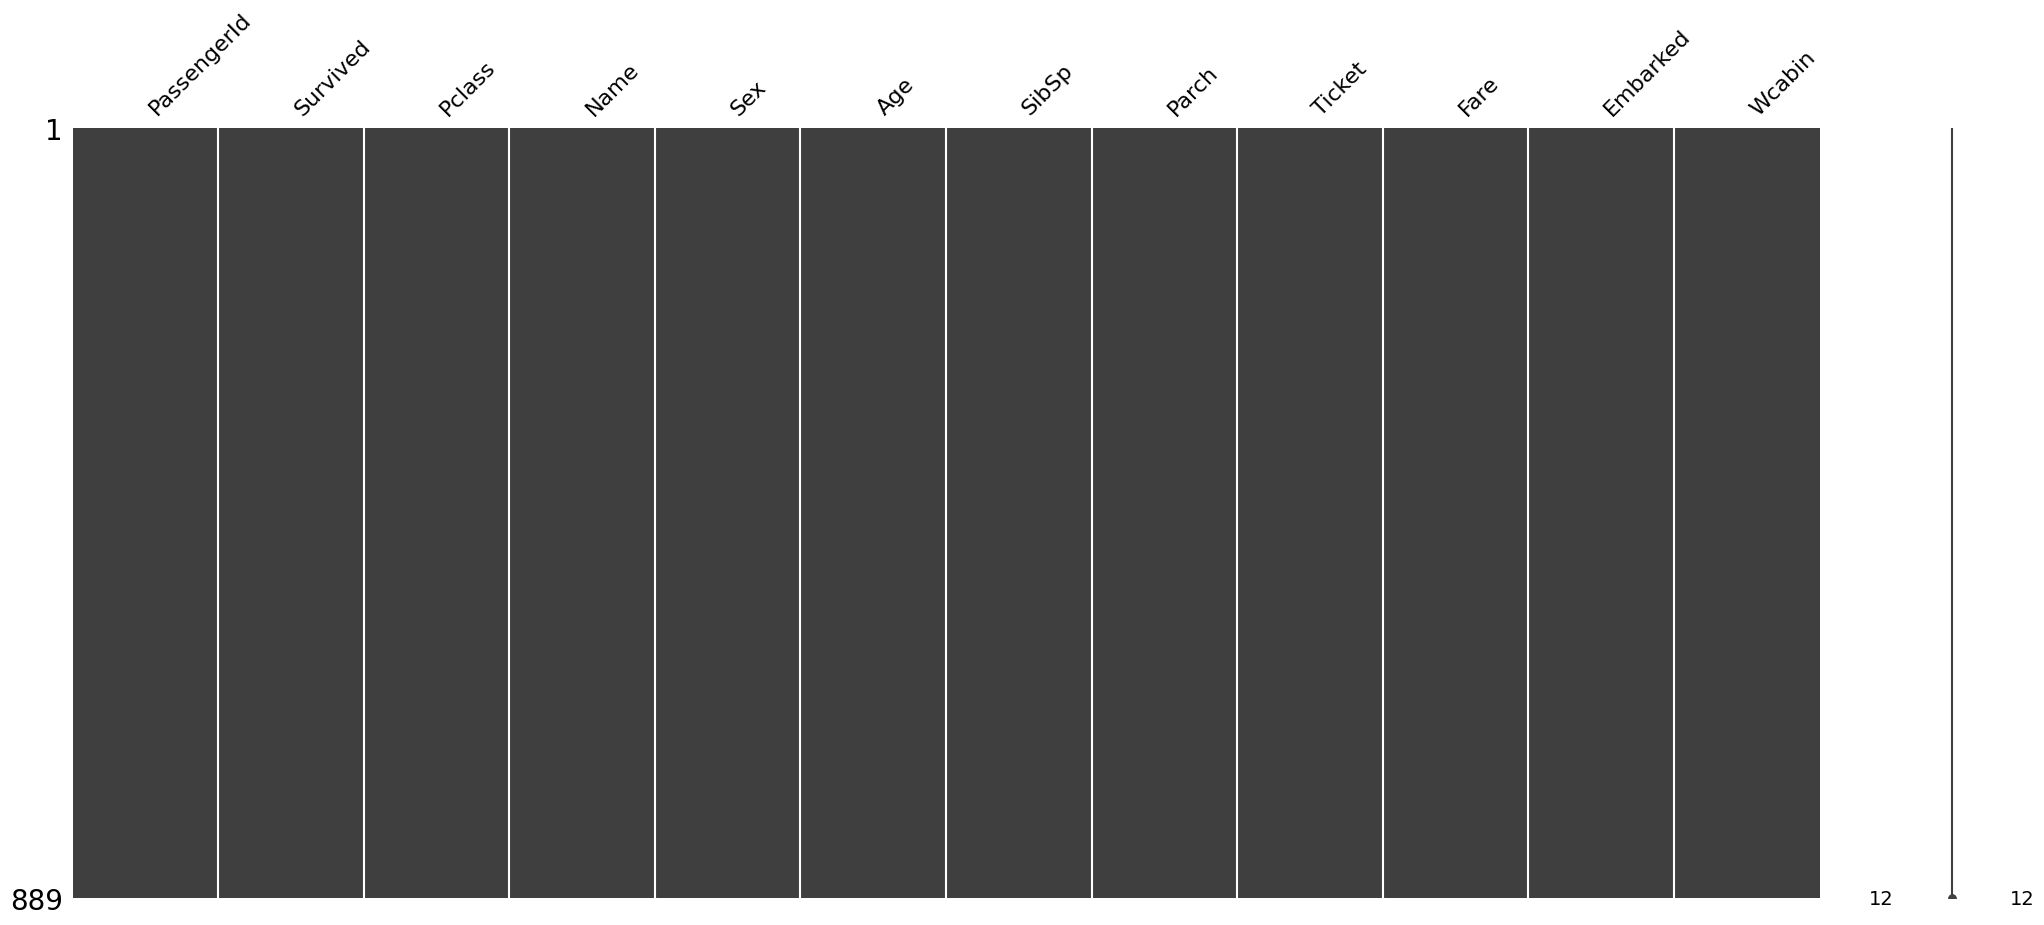

In [ ]:
#dropping rows with missing values
titanic.dropna(inplace=True)
msno.matrix(titanic)

**We ended up with 889 rows.**

In [ ]:
titanic.to_excel('titanic_mean.xlsx')

# **Exploratory Data Analysis**

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Wcabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


### **Hypothesis testing**

### ***Pclass vs. Survival***

**We will start by checking if the Survival significantly differs across Passenger Classes**

In [ ]:
Pclass = titanic[['PassengerId','Pclass','Survived']]
Pclass.set_index('PassengerId', inplace=True)
Pclass.head()

,Pclass,Survived
PassengerId,,
1,3,0
2,1,1
3,3,1
4,1,1
5,3,0


In [ ]:
Pclass = pd.pivot_table(titanic,index=['Pclass'],columns=['Survived'],aggfunc='size')
Pclass

Survived,0,1
Pclass,,
1,80,134
2,97,87
3,372,119


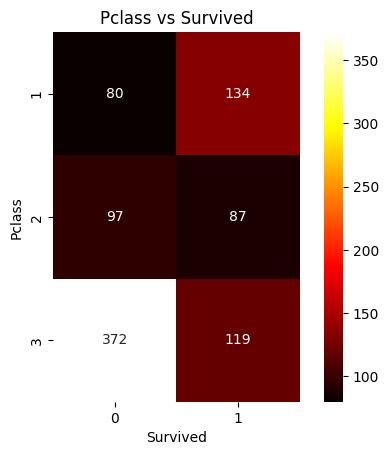

In [ ]:
sns.heatmap(Pclass,annot=True, fmt='g',square=True,cmap='hot')
plt.title('Pclass vs Survived')
plt.show()

In [ ]:
pct_class = Pclass.sum(axis=1)/889
pct_class

Pclass
1    0.240720
2    0.206974
3    0.552306
dtype: float64

In [ ]:
pct_survived = Pclass.sum(axis=0)/889
pct_survived

Survived
0    0.617548
1    0.382452
dtype: float64

In [ ]:
pct_class.to_frame()@(pct_survived.to_frame().T)

Survived,0,1
Pclass,,
1,0.148656,0.092064
2,0.127816,0.079158
3,0.341075,0.211231


In [ ]:
exp = round(pct_class.to_frame()@(pct_survived.to_frame().T)*889)
exp

Survived,0,1
Pclass,,
1,132.0,82.0
2,114.0,70.0
3,303.0,188.0


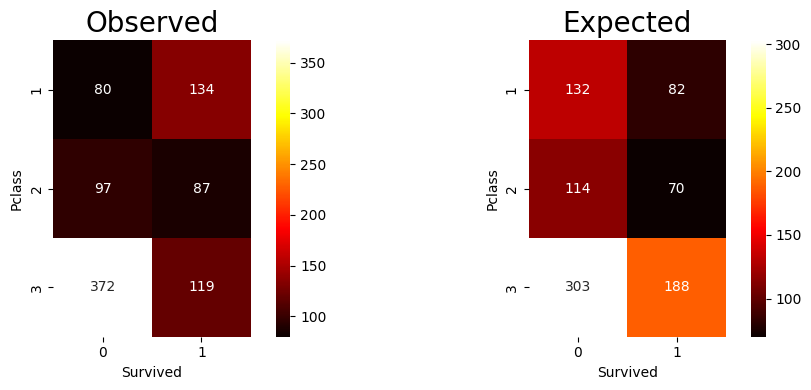

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(121)
sns.heatmap(Pclass,annot=True, fmt='g',square=True,cmap='hot')
plt.title('Observed',fontsize=20)

plt.subplot(122)
sns.heatmap(exp,annot=True, fmt='g',square=True,cmap='hot')
plt.title('Expected',fontsize=20)
plt.tight_layout()


plt.show()

In [ ]:
Chi_table = ((Pclass - exp)**2)/exp
Chi_table

Survived,0,1
Pclass,,
1,20.484848,32.975610
2,2.535088,4.128571
3,15.712871,25.324468


In [ ]:
from scipy.stats.distributions import chi2

Chi_value = Chi_table.sum().sum()

p_value = chi2.sf(Chi_value,1)

print("Chi square value is ",Chi_value)
print("P value is",p_value)

Chi square value is  101.16145676105081
P value is 8.478313513708386e-24


In [ ]:
from scipy import stats
chi2_stat, p_val, dof, ex = stats.chi2_contingency(Pclass)

print("Chi square value is ",chi2_stat)
print("P value is",p_val)
print("Degrees of Freedom:",dof)

Chi square value is  100.98040726128336
P value is 1.1813624785477922e-22
Degrees of Freedom: 2


### ***Sex vs. Survival***

**Checking if Survival is associated with Sex**

In [ ]:
Sex = pd.pivot_table(titanic,index=['Sex'],columns=['Survived'],aggfunc='size')
Sex

Survived,0,1
Sex,,
female,81,231
male,468,109


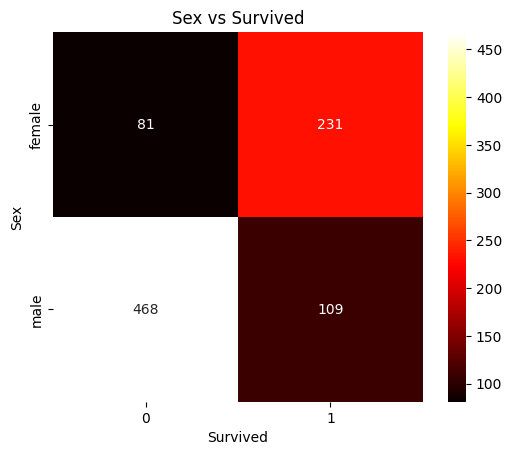

In [ ]:
sns.heatmap(Sex,annot=True, fmt='g',square=True,cmap='hot')
plt.title('Sex vs Survived')
plt.show()

In [ ]:
pct_sex = Sex.sum(axis=1)/889
pct_sex

Sex
female    0.350956
male      0.649044
dtype: float64

In [ ]:
pct_survived = Sex.sum(axis=0)/889
pct_survived

Survived
0    0.617548
1    0.382452
dtype: float64

In [ ]:
pct_sex.to_frame()@(pct_survived.to_frame().T)

Survived,0,1
Sex,,
female,0.216732,0.134224
male,0.400816,0.248228


In [ ]:
exp = round(pct_sex.to_frame()@(pct_survived.to_frame().T)*889)
exp

Survived,0,1
Sex,,
female,193.0,119.0
male,356.0,221.0


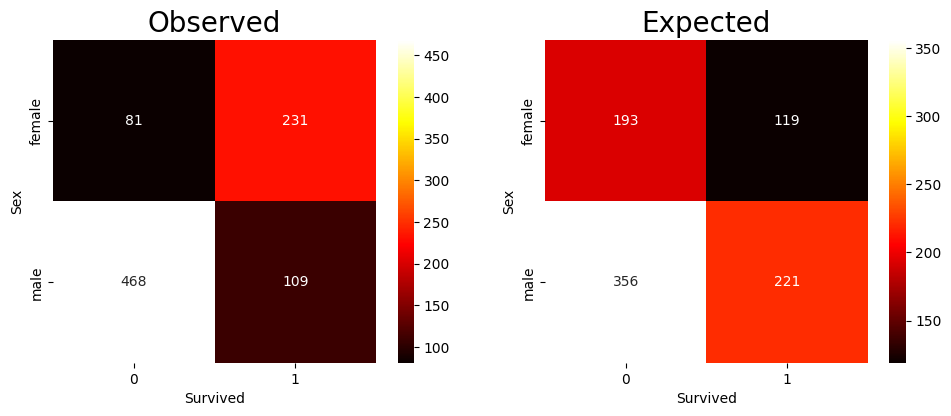

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(121)
sns.heatmap(Sex,annot=True, fmt='g',square=True,cmap='hot')
plt.title('Observed',fontsize=20)

plt.subplot(122)
sns.heatmap(exp,annot=True, fmt='g',square=True,cmap='hot')
plt.title('Expected',fontsize=20)
plt.tight_layout()


plt.show()

In [ ]:
Chi_table = ((Sex - exp)**2)/exp
Chi_table

Survived,0,1
Sex,,
female,64.994819,105.411765
male,35.235955,56.760181


In [ ]:
from scipy.stats.distributions import chi2

Chi_value = Chi_table.sum().sum()

p_value = chi2.sf(Chi_value,1)

print("Chi square value is ",Chi_value)
print("P value is",p_value)

Chi square value is  262.40271941038696
P value is 5.137948759763472e-59


In [ ]:
from scipy import stats
chi2_stat, p_val, dof, ex = stats.chi2_contingency(Sex)

print("Chi square value is ",chi2_stat)
print("P value is",p_val)
print("Degrees of Freedom:",dof)

Chi square value is  258.4266104463763
P value is 3.7799096665576e-58
Degrees of Freedom: 1


### ***Embarked vs. Survival***

**Checking if Survival is associated with Sex**

In [ ]:
Embarked = pd.pivot_table(titanic,index=['Embarked'],columns=['Survived'],aggfunc='size')
Embarked

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


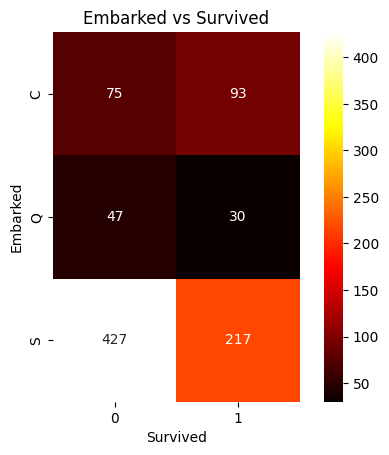

In [ ]:
sns.heatmap(Embarked,annot=True, fmt='g',square=True,cmap='hot')
plt.title('Embarked vs Survived')
plt.show()

In [ ]:
pct_embarked = Embarked.sum(axis=1)/889
pct_embarked

Embarked
C    0.188976
Q    0.086614
S    0.724409
dtype: float64

In [ ]:
pct_survived = Embarked.sum(axis=0)/889
pct_survived

Survived
0    0.617548
1    0.382452
dtype: float64

In [ ]:
pct_embarked.to_frame()@(pct_survived.to_frame().T)

Survived,0,1
Embarked,,
C,0.116702,0.072274
Q,0.053488,0.033126
S,0.447357,0.277052


In [ ]:
exp = round(pct_embarked.to_frame()@(pct_survived.to_frame().T)*889)
exp

Survived,0,1
Embarked,,
C,104.0,64.0
Q,48.0,29.0
S,398.0,246.0


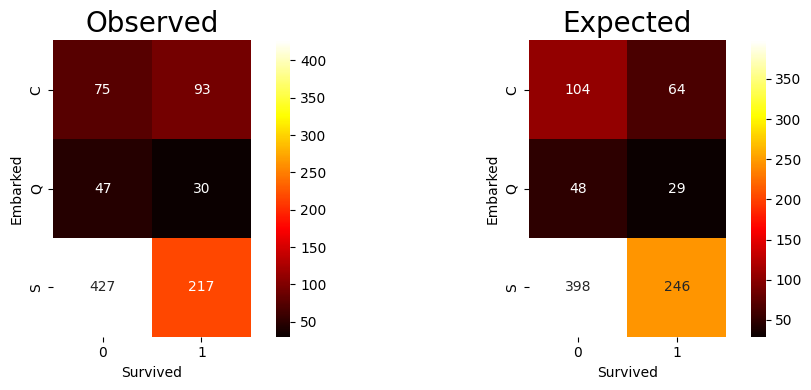

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(121)
sns.heatmap(Embarked,annot=True, fmt='g',square=True,cmap='hot')
plt.title('Observed',fontsize=20)

plt.subplot(122)
sns.heatmap(exp,annot=True, fmt='g',square=True,cmap='hot')
plt.title('Expected',fontsize=20)
plt.tight_layout()


plt.show()

In [ ]:
Chi_table = ((Embarked - exp)**2)/exp
Chi_table

Survived,0,1
Embarked,,
C,8.086538,13.140625
Q,0.020833,0.034483
S,2.113065,3.418699


In [ ]:
from scipy.stats.distributions import chi2

Chi_value = Chi_table.sum().sum()

p_value = chi2.sf(Chi_value,1)

print("Chi square value is ",Chi_value)
print("P value is",p_value)

Chi square value is  26.81424406711752
P value is 2.2398031934666561e-07


In [ ]:
from scipy import stats
chi2_stat, p_val, dof, ex = stats.chi2_contingency(Embarked)

print("Chi square value is ",chi2_stat)
print("P value is",p_val)
print("Degrees of Freedom:",dof)

Chi square value is  26.48914983923762
P value is 1.769922284120912e-06
Degrees of Freedom: 2


### **Machine Learning**

In [ ]:
titanic['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [ ]:
# write list of features we want to use
features = ["Pclass","Age"]

# Set X
X = titanic[features]
y = titanic['Survived']

# X.head()
X

,Pclass,Age
0,3,22.00000
1,1,38.00000
2,3,26.00000
3,1,35.00000
4,3,35.00000
...,...,...
886,2,27.00000
887,1,19.00000
888,3,25.14062
889,1,26.00000


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
from sklearn.linear_model import LogisticRegression # linear model for classification

# initialize model
log_reg = LogisticRegression()

# fit model
log_reg.fit(X_train, y_train)

# predictions
y_pred = log_reg.predict(X_test)

In [ ]:
X_train

,Pclass,Age
6,1,54.00000
576,2,34.00000
445,1,4.00000
74,3,32.00000
670,2,40.00000
...,...,...
107,3,25.14062
271,3,25.00000
862,1,48.00000
436,3,21.00000


In [ ]:
y_train

6      0
576    1
445    1
74     1
670    1
      ..
107    1
271    1
862    1
436    0
103    0
Name: Survived, Length: 595, dtype: object

In [ ]:
y_pred

array(['0', '1', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0',
       '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '1',
       '0', '0', '1', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0',
       '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0',
       '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0',
       '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0',
       '0', '0', '0', '1', '1', '0', '0', '1', '1', '1', '1', '0', '0',
       '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0',
       '0', '1', '1', '0', '1', '0', '1', '0', '0', '1', '1', '0', '1',
       '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0',
       '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0

In [ ]:
# feature importance
log_reg.coef_

array([[-1.11186036, -0.03868323]])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# confusion matrix
cf = confusion_matrix(y_test, y_pred) #<-- we want to compare the y results and our prediction - how accurate our predictions are
cf

array([[157,  27],
       [ 53,  57]])

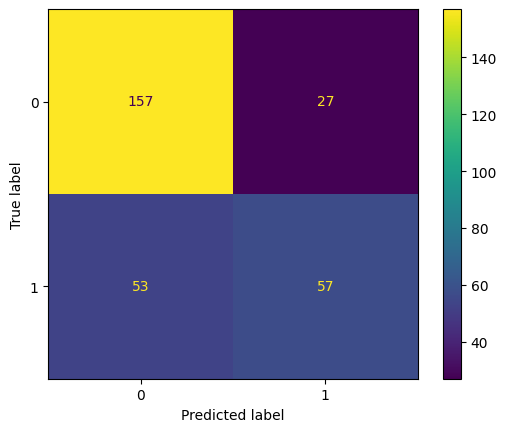

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=log_reg.classes_)

disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80       184
           1       0.68      0.52      0.59       110

    accuracy                           0.73       294
   macro avg       0.71      0.69      0.69       294
weighted avg       0.72      0.73      0.72       294

